# Preparation

<b>Load Libraries</b>

In [53]:
# data structures
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.api import qqplot
## settings
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_theme('notebook')

<b>Load Dataset</b>

In [12]:
# dataset
df_base = pd.read_csv('../cache/data/cleaned.csv')
##
num_cols = df_base.select_dtypes(np.number).columns.tolist()
cat_cols = df_base.select_dtypes('object').columns.tolist()

<b>UDF</b>

In [13]:
# plotting: histogram
def plot_hist(ax, name: str):
    g = sns.histplot(df_base[name], kde=True, ax=ax)
    g.axes.lines[0].set_color('r')
    g.set_ylabel(None)
    ##
    mean, median = df_base[name].mean(), df_base[name].median()
    max_ylim = g.axes.get_ylim()[1]
    ##
    g.axvline(mean, linestyle='--', color='black')
    g.axvline(median, linestyle='--', color='black')
    ##
    if mean > median:
        xytext_mean = (mean*1.3, max_ylim*0.75)
        xytext_median = (median*0.45, max_ylim*0.65)
    else:
        xytext_mean = (mean*0.75, max_ylim*0.75)
        xytext_median = (median*1.25, max_ylim*0.6)
    ## mean
    g.annotate(text=f'Mean\n{round(mean, 2)}', xytext=xytext_mean,
            xy=(mean, max_ylim*0.5), arrowprops=dict(facecolor='black'))
    ## median
    g.annotate(text=f'Median\n{round(median, 2)}', xytext=xytext_median,
               xy=(median, max_ylim*0.5), arrowprops=dict(facecolor='black', width=3))

In [74]:
# plotting: boxen
def plot_boxen(ax, name: str):
    sns.boxenplot(df_base[name], orient='h', ax=ax)

def plot_qq(ax, name: str):
    qqplot(df_base[name], line='45', ax=ax)

def plot_treemap(ax, name: str):
    data_to_plot = df_base[name].value_counts()
    sizes, labels = data_to_plot.values, data_to_plot.index.tolist()
    labels = [f'{label}\n{size}' for label, size in zip(labels, sizes)]

    g = squarify.plot(sizes=sizes, label=labels, 
                  color=sns.color_palette('husl', n_colors=len(labels)), 
                  ax=ax)
    g.set_title(label=name, fontdict=dict(size=17))

# General

<b>Univariate Analysis</b>

In [15]:
# summarize statistics: numeric
df_base[num_cols].describe([0.01, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Tenure,7043.0,32.371149,24.559481,0.00,1.0,9.00,29.000,55.0000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,35.50,70.350,89.8500,114.729,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,19.9,401.45,1397.475,3794.7375,8039.883,8684.80


In [16]:
# summarize statistics: categorical
df_base[cat_cols].describe().T

,count,unique,top,freq
Gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


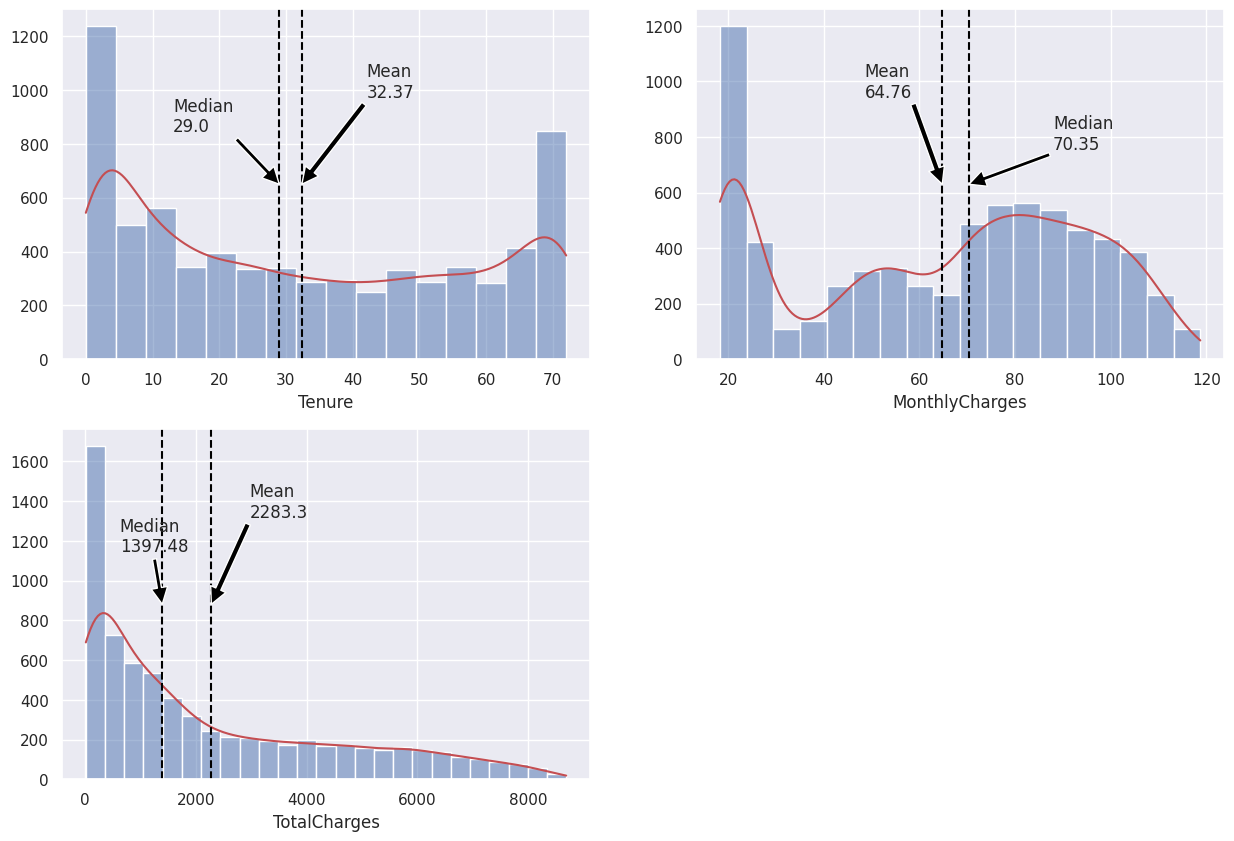

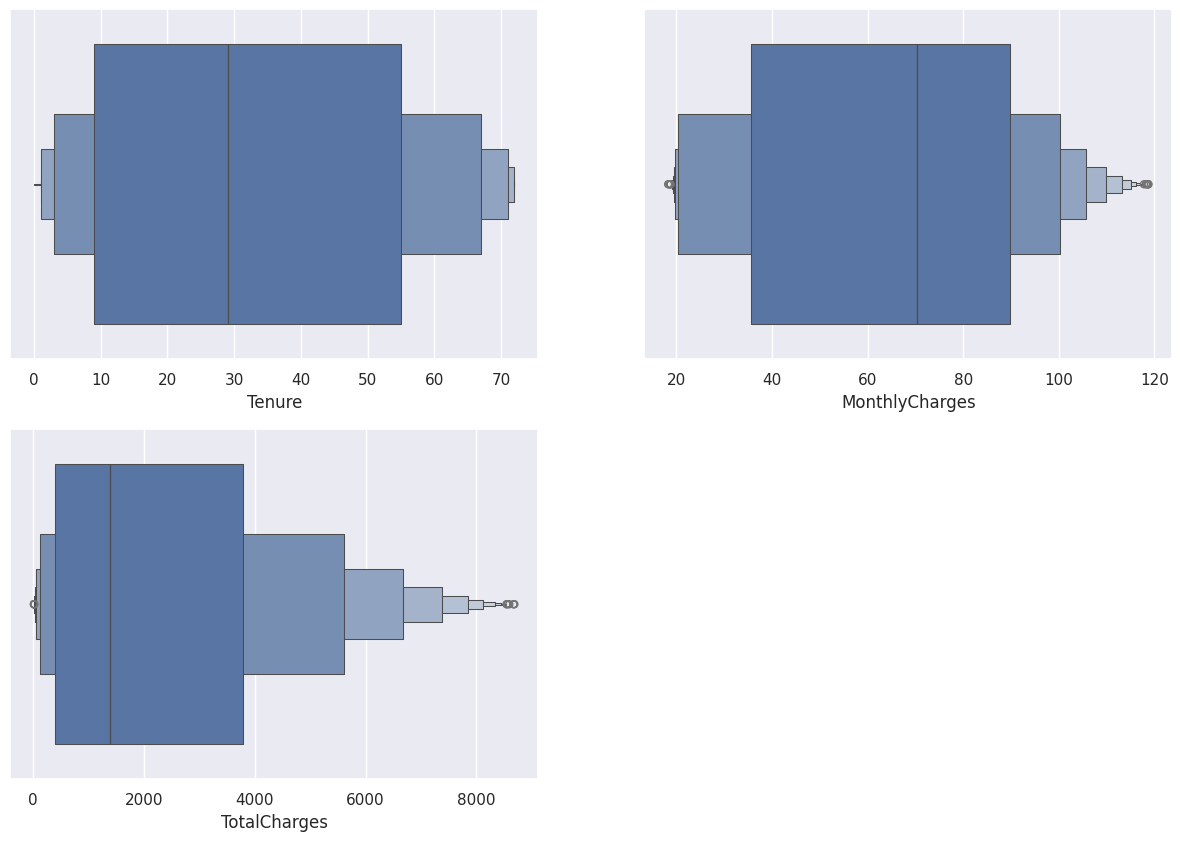

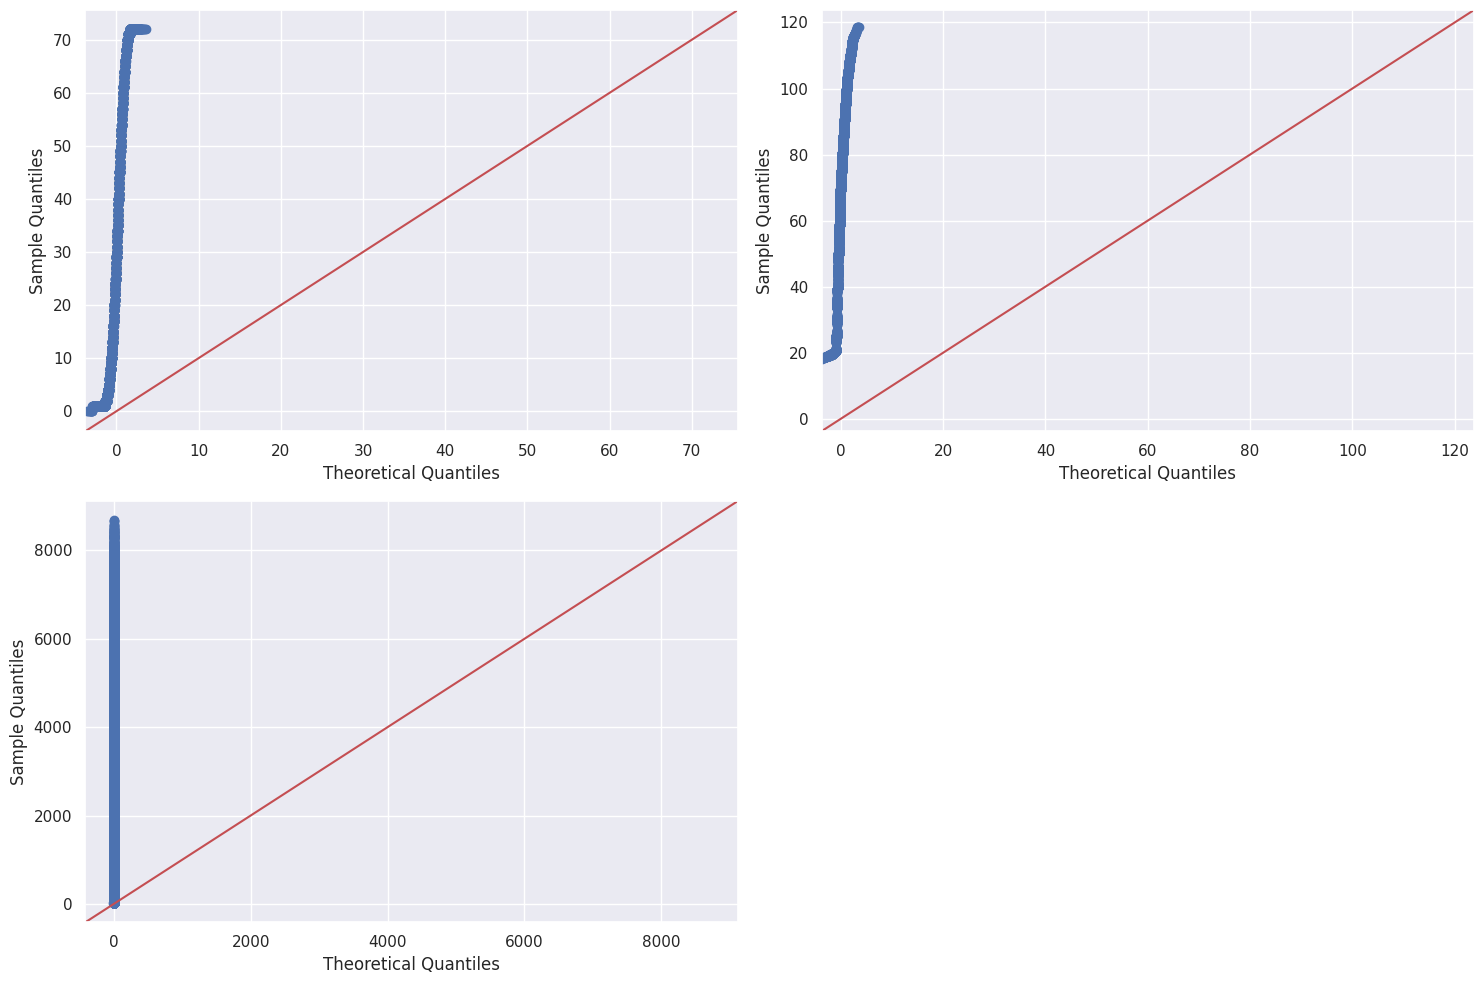

In [51]:
# graphs: histogram, boxen, qq
axes, figs = dict(), dict()
gragh_names = ['hist', 'boxen', 'qq']
for name in gragh_names:
    figs[name], axes[name] = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)

names = num_cols.copy()
names.append('0')
names = np.array(names)\
    .reshape(2, 2)

for i in range(2):
    for j in range(2):
        if names[i, j] != '0':
            plot_hist(ax=axes['hist'][i, j], name=names[i, j])
            plot_boxen(ax=axes['boxen'][i, j], name=names[i, j])
            plot_qq(ax=axes['qq'][i, j], name=names[i, j])
        else:
            axes['hist'][i, j].set_visible(False)
            axes['boxen'][i, j].set_visible(False)
            axes['qq'][i, j].set_visible(False)

for name in gragh_names:
    figs[name].savefig(f'../cache/graphs/univariate_{name}.png')

plt.tight_layout()
plt.show()

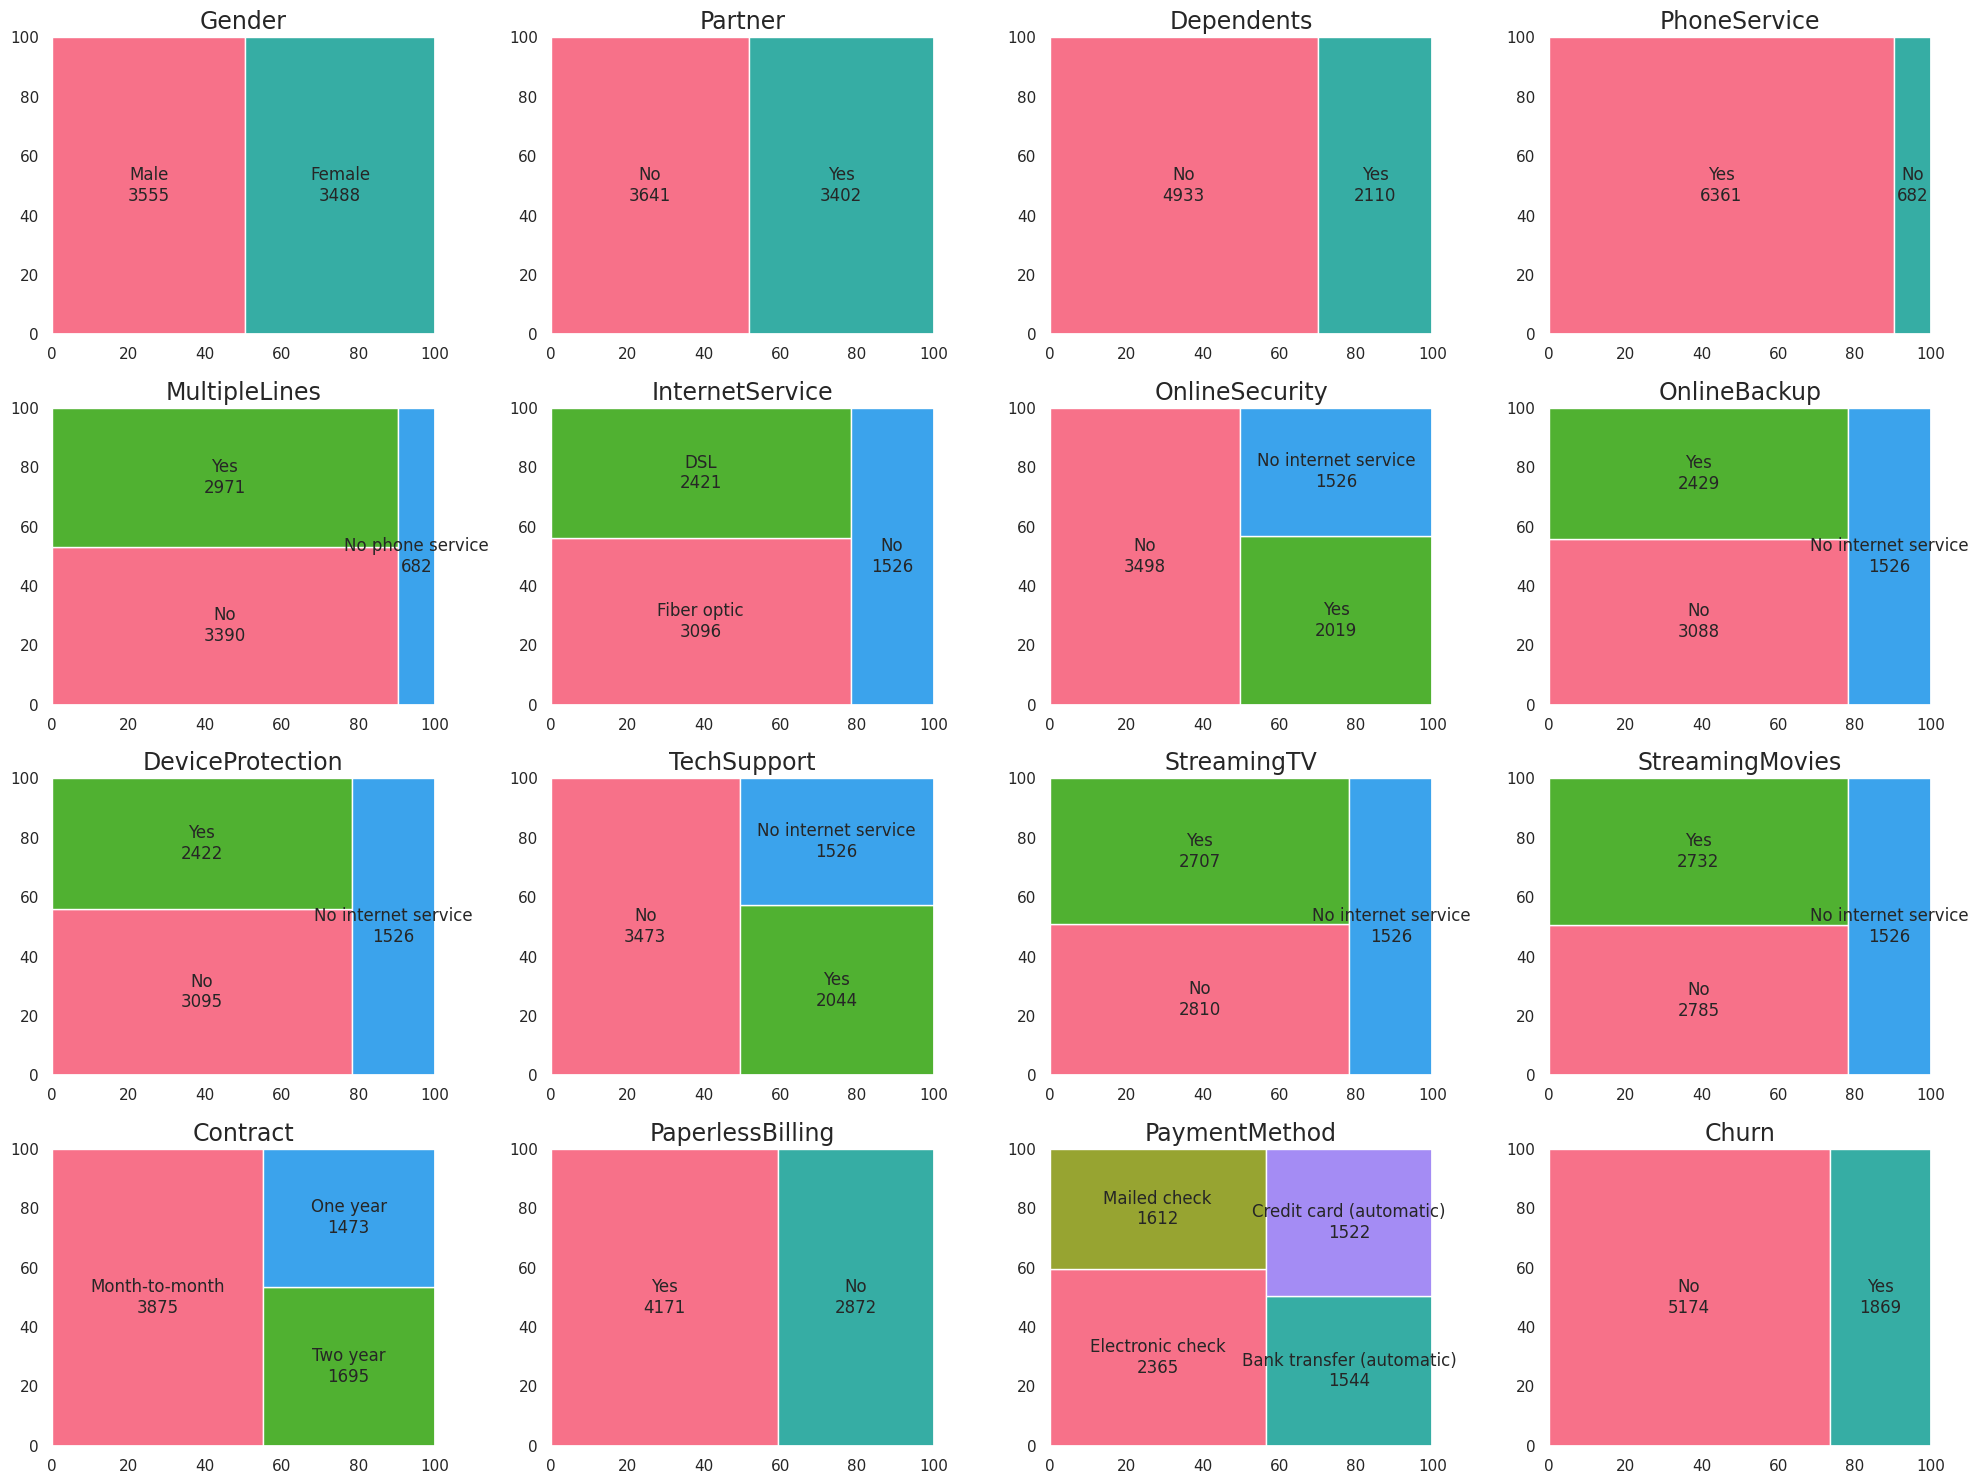

In [75]:
# treemap
names = np.array(cat_cols.copy())\
    .reshape(4, 4)
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=False, 
                         figsize=(20, 15))

for i in range(4):
    for j in range(4):
        plot_treemap(ax=axes[i, j], name=names[i, j])

fig.savefig('../cache/graphs/univariate_treemap.png')

plt.tight_layout()
plt.show()